In [1]:
import pandas as pd
import re
from os import walk
import preprocessing as pp

In [2]:
pp.add_label('data/NonVPN-PCAPs-01/','data/NonVPN-PCAPs-01/','nonvpn1_labeled')
pp.add_label('data/NonVPN-PCAPs-02/','data/NonVPN-PCAPs-02/','nonvpn2_labeled')

AttributeError: 'NoneType' object has no attribute 'group'

In [4]:
df_darknet = pd.read_csv('data/darknet.csv')

In [7]:
df_darknet.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

C:\Users\Tim\AppData\Local\Temp/ipykernel_13124/3178340911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horse['Flow Duration'] = horse['Flow Duration']/1000000
C:\Users\Tim\AppData\Local\Temp/ipykernel_13124/3178340911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horse['Tot Pkts'] = horse['Total Fwd Packet'] + horse['Total Bwd packets']


2691

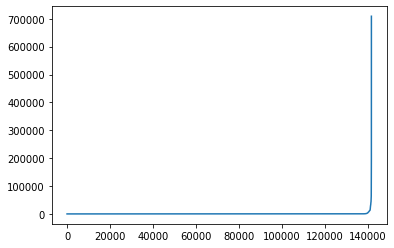

In [11]:
horse = df_darknet[['Flow ID','Total Fwd Packet', 'Total Bwd packets','Idle Mean','Idle Std','Idle Max','Idle Min', 'Flow Duration','Protocol']]
horse['Flow Duration'] = horse['Flow Duration']/1000000
horse['Tot Pkts'] = horse['Total Fwd Packet'] + horse['Total Bwd packets']
horse = horse.sort_values(by='Tot Pkts').reset_index()
horse['Tot Pkts'].plot()
# horse['Tot Pkts'].plot.hist(bins=100)
len(horse['Tot Pkts'].unique())

In [16]:
df_nonvpn1 = pd.read_csv('data/NonVPN-PCAPs-01/nonvpn1_labeled.csv')
df_nonvpn2 = pd.read_csv('data/NonVPN-PCAPs-02/nonvpn2_labeled.csv')
df_nonvpn1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/NonVPN-PCAPs-02/nonvpn2_labeled.csv'

In [10]:
horse = df_nonvpn1[['Flow ID','Tot Fwd Pkts', 'Tot Bwd Pkts','Idle Mean','Idle Std','Idle Max','Idle Min', 'Flow Duration','Protocol']]
horse['Flow Duration'] = horse['Flow Duration']/1000000
horse['Tot Pkts'] = horse['Tot Fwd Pkts'] + horse['Tot Bwd Pkts']
horse = horse.sort_values(by='Tot Pkts').reset_index()
horse['Tot Pkts'].plot()
# horse['Tot Pkts'].plot.hist(bins=100)
len(horse['Tot Pkts'].unique())

C:\Users\Tim\AppData\Local\Temp/ipykernel_13124/2562216238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  horse['Flow Duration'] = horse['Flow Duration']/1000000


KeyError: 'Tot Fwd Pkts'

## testing whether active_max is strictly < activity timeout (set to 5s)

In [45]:
dir = "data/compleet.csv"
df = pd.read_csv(dir)
active_max_min = df[['Active Min', 'Active Max']]
active_min = active_max_min.iloc[:,0]
active_max = active_max_min.iloc[:,1]
print(f'active_min min: {active_min.min()/1000000}')
print(f'active_max max: {active_max.max()/1000000}')

active_min min: 0.0
active_max max: 110.553433


<AxesSubplot:>

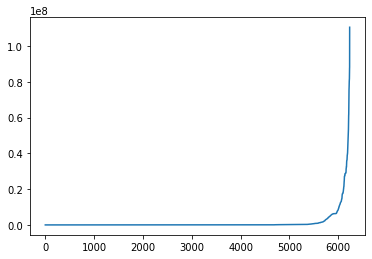

In [53]:
sorted_active_max = active_max.sort_values().reset_index()['Active Max']
sorted_active_max.plot()

<AxesSubplot:>

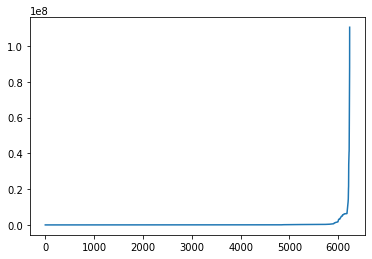

In [54]:
sorted_active_min = active_min.sort_values().reset_index()['Active Min']
sorted_active_min.plot()

## testing whether idle is strictly < flow timeout (set to 120s)

In [31]:
dir = "data/compleet.csv"
df = pd.read_csv(dir)
idle_active_max = df[['Idle Max', 'Active Max']]
idle_max = idle_active_max.iloc[:,0]
active_max = idle_active_max.iloc[:,1]
print(f'idle_max max: {idle_max.max()/1000000}')
print(f'active_max max: {active_max.max()/1000000}')

idle_max max: 119.460929
active_max max: 110.553433


<AxesSubplot:>

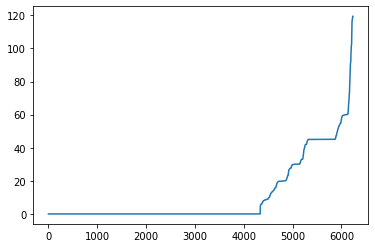

In [42]:
sorted_idle_max = df[['Idle Max']].sort_values(by='Idle Max').reset_index()['Idle Max'].apply(lambda x: x/1000000)
sorted_idle_max.plot()